Use the new cice grid scripts and compare it to the old results

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cf_xarray
import rioxarray

In [2]:
_data_dir = {
    '1deg':'/g/data/ik11/inputs/access-om2/input_20201102/',
    '025deg':'/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/',
    '01deg':'/g/data/ik11/inputs/access-om2/input_20201102/'
}
    


In [3]:
cd /g/data/tm70/as2285/om3-scripts/grid_generation

/g/data/tm70/as2285/om3-scripts/grid_generation


In [4]:
res = ['1deg', '025deg', '01deg']

# From esmgrids script

1deg
new vars not in old?
{'crs'}
missing vars in new?
{'lonu_bonds', 'latu_bonds', 'hue', 'latt_bonds', 'hun', 'lont_bonds'}
angleT anom min: nan, anom max: nan
uarea anom min: -1186349698.6215067, anom max: 33617654.79803729
ulon anom min: nan, anom max: nan
ulat anom min: nan, anom max: nan
hte anom min: nan, anom max: nan
angle anom min: nan, anom max: nan
tlon anom min: nan, anom max: nan
tarea anom min: -19085417.985637665, anom max: 9877771.11514306
htn anom min: nan, anom max: nan
tlat anom min: nan, anom max: nan
025deg
new vars not in old?
{'crs'}
missing vars in new?
set()
angleT anom min: nan, anom max: nan
uarea anom min: -69552757.44506374, anom max: 7366673.800787419
ulon anom min: 3.620558794636963e-05, anom max: 3.141592653589793
ulat anom min: -0.0018422347075643941, anom max: 0.0018422347075643941
hte anom min: nan, anom max: nan
angle anom min: -1.5707963267948966, anom max: 1.5707963267948966
tlon anom min: nan, anom max: nan
tarea anom min: nan, anom max: nan
htn 

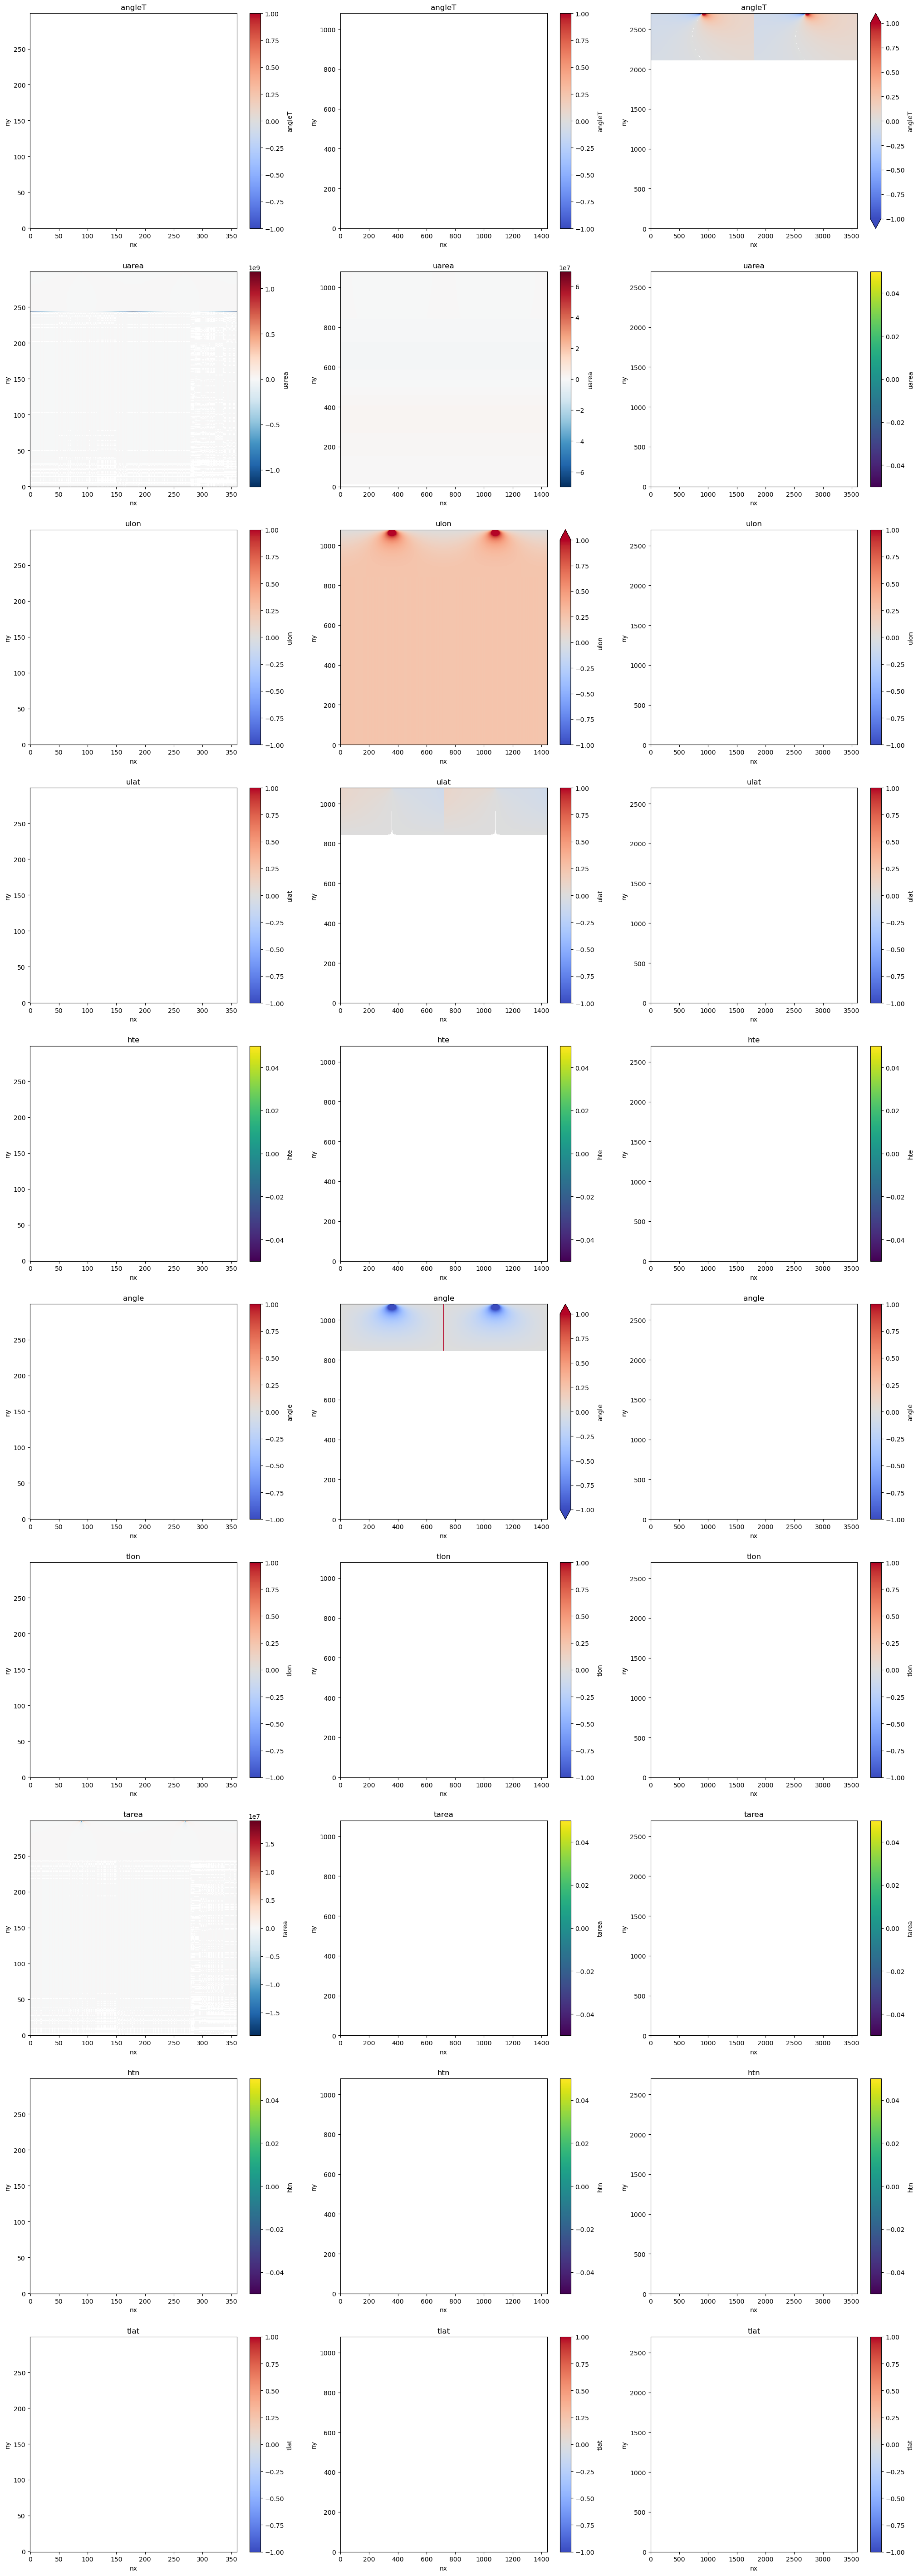

In [5]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.variables).difference(old_cice_grid.variables))
    print("missing vars in new?")
    print(set(old_cice_grid.variables).difference(new_cice_grid.variables))
    
    for j,jVar in enumerate(set(new_cice_grid.variables).intersection(old_cice_grid.variables)):
        
        plt.subplot(
            len(new_cice_grid.variables),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        if (jVar in (['ulat','ulon','tlat','tlon', 'angle', 'angleT'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

Confirm what is going on with 1degree u area

In [6]:
iRes = '1deg'
old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

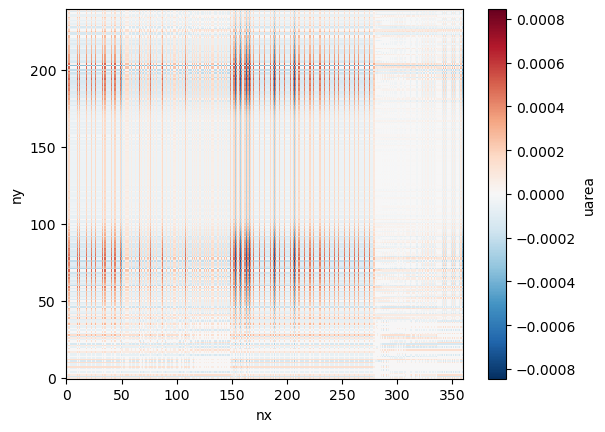

In [7]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,240)).uarea.plot()

More detail on 0.25 uarea

In [8]:
iRes = '025deg'
old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/grid.nc')
new_cice_grid = xr.open_dataset(f'{iRes}/grid.nc')

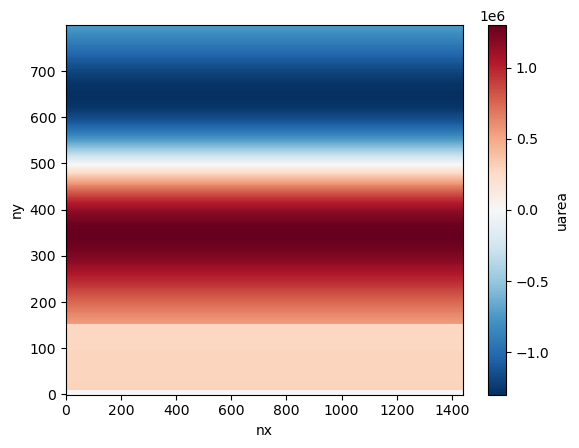

In [9]:
(new_cice_grid-old_cice_grid).sel(ny=slice(None,800)).uarea.plot()

Uarea was just set the same as tarea!

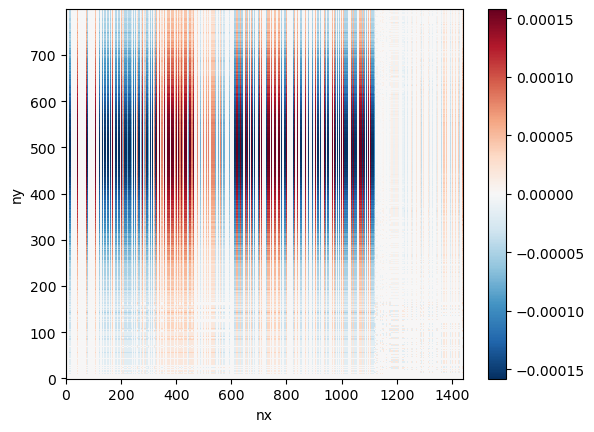

In [10]:
(old_cice_grid.tarea-old_cice_grid.uarea).isel(ny=slice(None,800)).plot()

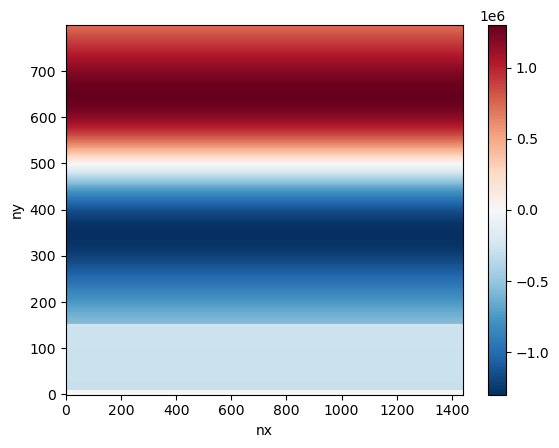

In [11]:
(new_cice_grid.tarea-new_cice_grid.uarea).isel(ny=slice(None,800)).plot()

Did we set the cf-attributes well?

In [12]:
new_cice_grid

<xarray.Dataset> Size: 124MB
Dimensions:  (ny: 1080, nx: 1440)
Coordinates:
    ulat     (ny, nx) float64 12MB ...
    ulon     (ny, nx) float64 12MB ...
    tlat     (ny, nx) float64 12MB ...
    tlon     (ny, nx) float64 12MB ...
Dimensions without coordinates: ny, nx
Data variables:
    htn      (ny, nx) float64 12MB ...
    hte      (ny, nx) float64 12MB ...
    angle    (ny, nx) float64 12MB ...
    angleT   (ny, nx) float64 12MB ...
    tarea    (ny, nx) float64 12MB ...
    uarea    (ny, nx) float64 12MB ...
    crs      |S1 1B ...
Attributes:
    timeGenerated:    2024-03-26 15:07:23.404309
    created_by:       as2285
    history:          Created using commit 377ea07f56c42c22aeee243584ea41777d...
    inputfile:        /g/data/ik11/inputs/access-om2/input_20230515_025deg_to...
    inputfile_md5:    38b6f324ae16cc13c180699123ad85b5
    history_command:  python make_CICE_grid.py /g/data/ik11/inputs/access-om2...
    Conventions:      CF-1.6

In [13]:
new_cice_grid.cf

Coordinates:
             CF Axes:   X, Y, Z, T: n/a

      CF Coordinates:   longitude: ['tlon', 'ulon']
                        latitude: ['tlat', 'ulat']
                        vertical, time: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   latitude: ['tlat', 'ulat']
                        longitude: ['tlon', 'ulon']

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   angle_of_rotation_from_east_to_x: ['angle', 'angleT']
                        cell_area: ['tarea', 'uarea']

              Bounds:   n/a

       Grid Mappings:   tripolar_latitude_longitude: ['crs']

And the CRS?

In [14]:
new_cice_grid.rio.crs

In [15]:
rio_ds = rioxarray.open_rasterio(f'01deg/grid.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/rioxarray/_io.py:1132: NotGeore

Rio doesn't handle 2d geolocation arrays

In [16]:
! gdalinfo NETCDF:01deg/grid.nc:uarea

Warning 1: dimension #1 (nx) is not a Longitude/X dimension.
Warning 1: dimension #0 (ny) is not a Latitude/Y dimension.
Driver: netCDF/Network Common Data Format
Files: 01deg/grid.nc
Size is 3600, 2700
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["radians",1],
        ID["EPSG",8901]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["radians",1,
                ID["EPSG",9122]]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["radians",1,
                ID["EPSG",9122]]]]
Data axis to CRS axis mapping: 2,1
Metadata:
  crs#crs_wkt=GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["radians",1,AUTH

GDAL doesn't seem to use the CRS for the geolocation array! https://github.com/COSIMA/om3-scripts/issues/7#issuecomment-2011723581

In [17]:
! gdalinfo NETCDF:{_data_dir[iRes]}/cice_01deg/grid.nc:uarea

ERROR 4: NETCDF:/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog//cice_01deg/grid.nc:uarea: No such file or directory
gdalinfo failed - unable to open 'NETCDF:/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog//cice_01deg/grid.nc:uarea'.


And again for kmt

1deg
new vars not in old?
set()
missing vars in new?
set()
kmt anom min: nan, anom max: nan
025deg
new vars not in old?
set()
missing vars in new?
set()
kmt anom min: nan, anom max: nan
01deg
new vars not in old?
set()
missing vars in new?
set()
kmt anom min: nan, anom max: nan


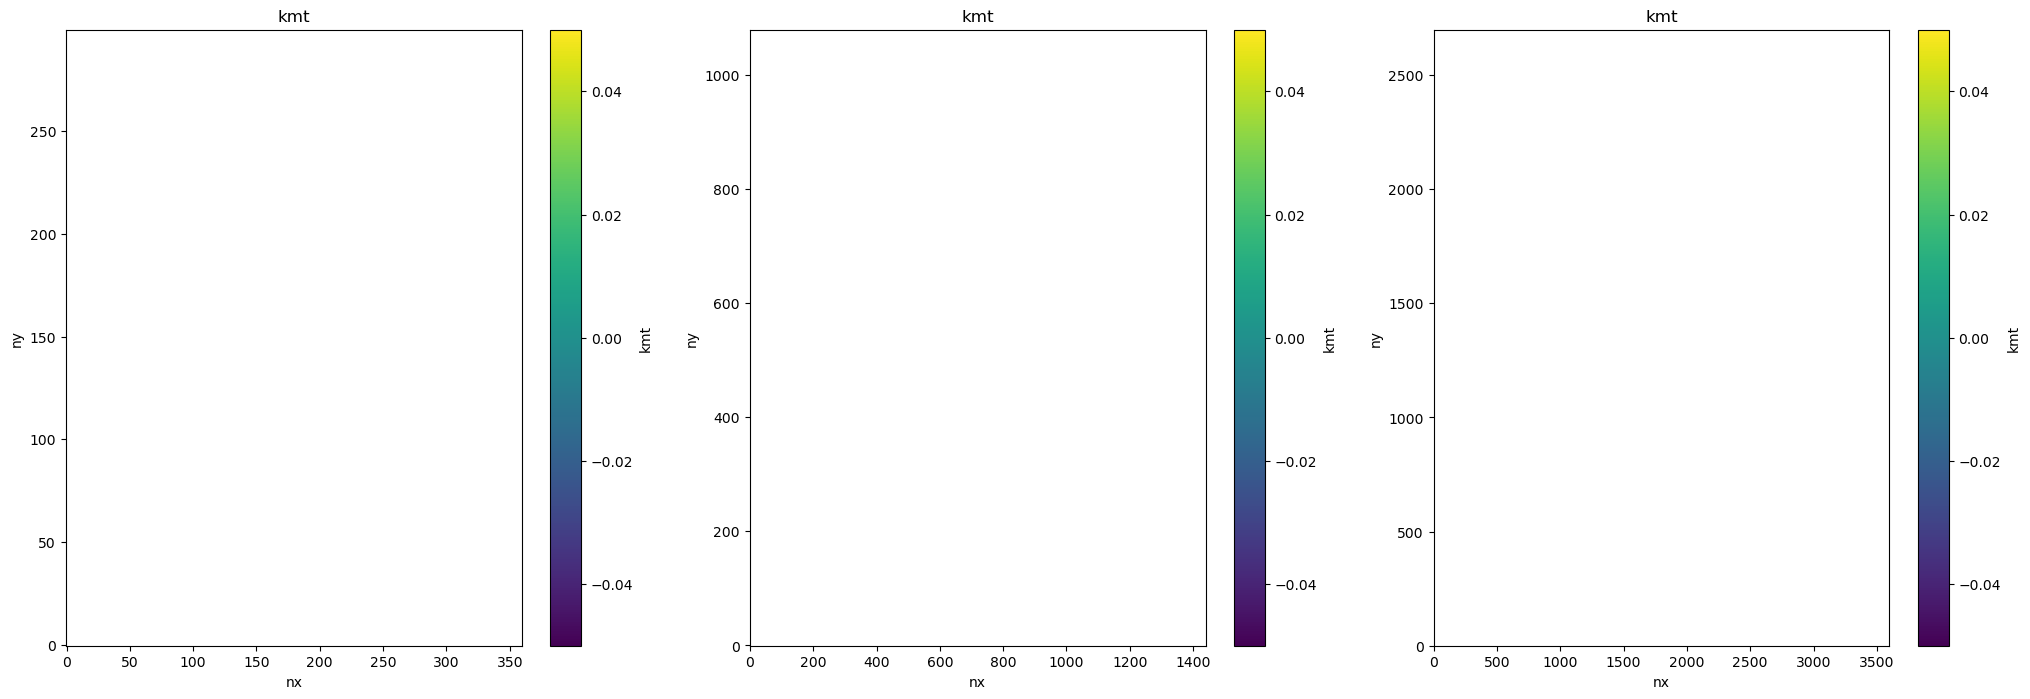

In [18]:
plt.figure(figsize=(25,8))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir[iRes]}/cice_{iRes}/kmt.nc')
    new_cice_grid = xr.open_dataset(f'{iRes}/kmt.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.variables).difference(old_cice_grid.variables))
    print("missing vars in new?")
    print(set(old_cice_grid.variables).difference(new_cice_grid.variables))
    
    for j,jVar in enumerate(set(new_cice_grid.variables).intersection(old_cice_grid.variables)):
        
        plt.subplot(
            len(new_cice_grid.variables),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        anom.plot()

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        plt.title(jVar)

In [19]:
! ncdump -h 025deg/kmt.nc

netcdf kmt {
dimensions:
	nx = 1440 ;
	ny = 1080 ;
variables:
	double kmt(ny, nx) ;

// global attributes:
		:timeGenerated = "2024-03-26 15:07:24.915736" ;
		:created_by = "as2285" ;
		:history = "Created using commit 377ea07f56c42c22aeee243584ea41777df260ff of git@github.com:COSIMA/om3-scripts.git" ;
		:inputfile = "/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/mom_025deg/ocean_mask.nc" ;
		:inputfile_md5 = "ee07436042b71df2938726854be5a9aa" ;
		:history_command = "python make_CICE_grid.py /g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/mom_025deg/ocean_hgrid.nc /g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/mom_025deg/ocean_mask.nc" ;
}


Let set our tolerance to 2e-6 as precision of float32 is 1e.6:

In [21]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

Plot all the differences in all vars and resolutions:

In [22]:
plt.figure(figsize=(25,80))

for i,iRes in enumerate(res):

    old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_{iRes}/grid.nc')
    new_cice_grid = xr.open_dataset(f'ezhil/grid_{iRes}.nc')

    print(iRes)
    print("new vars not in old?")
    print(set(new_cice_grid.data_vars).difference(old_cice_grid.data_vars))
    print("missing vars in new?")
    print(set(old_cice_grid.data_vars).difference(new_cice_grid.data_vars))
    
    for j,jVar in enumerate(new_cice_grid.data_vars):
        
        plt.subplot(
            len(new_cice_grid.data_vars),
            len(res),
            i+(j*len(res))+1
        )
        
                
        anom = (new_cice_grid[jVar]-old_cice_grid[jVar])

        anom = anom.where(abs(anom)>2e-6)

        print(f'{jVar} anom min: {anom.min().values}, anom max: {anom.max().values}')

        
        if (jVar in (['ulat','ulon','tlat','tlon'])):
            anom = np.rad2deg(anom)        
            anom.plot(vmin=-1, vmax=1, cmap='coolwarm')
        else:
            anom.plot()

        
        plt.title(jVar)

FileNotFoundError: [Errno 2] No such file or directory: b"/g/data/tm70/as2285/om3-scripts/grid_generation/{'1deg': '/g/data/ik11/inputs/access-om2/input_20201102/', '025deg': '/g/data/ik11/inputs/access-om2/input_20230515_025deg_topog/', '01deg': '/g/data/ik11/inputs/access-om2/input_20201102/'}/cice_1deg/grid.nc"

<Figure size 2500x8000 with 0 Axes>

More detail on 0.1 degree ulat/ulon and angle

In [ ]:
np.rad2deg((new_cice_grid-old_cice_grid).ulat).plot()

In [ ]:
np.rad2deg((new_cice_grid-old_cice_grid).ulon).plot(vmin=-1, vmax=1)

In [ ]:
np.rad2deg(old_cice_grid.sel(ny=slice(2100,None)).angleT).plot() #vmin=-1, vmax=1)

In [ ]:
np.rad2deg(new_cice_grid.sel(ny=slice(2100,None)).angleT).plot() #vmin=-1, vmax=1)

In [ ]:
np.rad2deg((new_cice_grid-old_cice_grid).sel(ny=slice(2100,None)).angleT).plot(vmin=-5, vmax=5)

In [ ]:
np.rad2deg((new_cice_grid-old_cice_grid).sel(ny=slice(2680,None), nx=slice(850,950)).angleT).plot()

In [ ]:
plt.pcolor(new_cice_grid.angleT.values-old_cice_grid.angleT.values)
plt.colorbar()

what is going on with 0.25 deg angle?

In [ ]:
old_cice_grid = xr.open_dataset(f'{_data_dir}/cice_025deg/grid.nc')
new_cice_grid = xr.open_dataset(f'grid_025deg.nc')


Looks to be the same problem as ulat / ulon, x is offset by 1:

In [ ]:
plt.pcolor(new_cice_grid.angle[:,:-1].values-old_cice_grid.angle[:,1:].values)
plt.colorbar()